# Time Series EDA

In [1]:
# 기본 라이브러리 로딩 및 사용자 정의함수 정의

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit
import matplotlib.style as style 

import warnings
warnings.filterwarnings('ignore')


# define universally useful UDFs

# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev


# custom min max scaler
def mnmx_scl(vec):
    vec = (vec-vec.min())/(vec.max()-vec.min())
    return(vec)

def zrmx_scl(vec):
    vec = vec/vec.max()
    return(vec)

# matplotlib 에서 한글을 표시하기 위한 설정
import matplotlib

font_name = matplotlib.font_manager.FontProperties(
                fname="c:/Windows/Fonts/malgun.ttf"  # 윈도우즈의 한글 폰트 위치를 지정
            ).get_name()
matplotlib.rc('font', family=font_name) # 한글 표시 가능하도록 폰트 지정 
matplotlib.rcParams['axes.unicode_minus'] = False #  음수를 나타내는 '-' 부호가 정상 표시되도록


# to set data path
dataPath = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/'

In [2]:
# 시계열 챠트

# date type 자료형 처리

## Yearly Data

In [3]:
# Mercedes-Benz GLS class sales

# Structure :: ['year','EUsales','USsales']

glssales = np.array([2006, 3007, 18776,
2007, 8027, 26396,
2008, 4227, 23328,
2009, 2871, 15012,
2010, 2249, 19943,
2011, 2508, 25139,
2012, 1573, 26042,
2013, 4829, 29912,
2014, 4187, 26597,
2015, 3753, 27707,
2016, 5361, 30442,
2017, 4537, 32248,
2018, 3534, 21973])

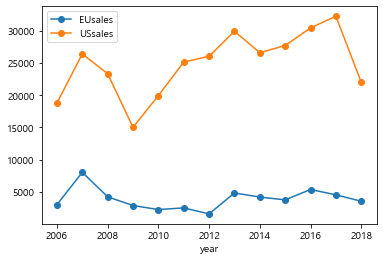

In [4]:
glssalesdf = pd.DataFrame(glssales.reshape(13,3))
glssalesdf.columns = ['year','EUsales','USsales']
glssalesdf.index = glssalesdf.year
glssalesdf = glssalesdf[['EUsales','USsales']]
glssalesdf.plot(marker='o')

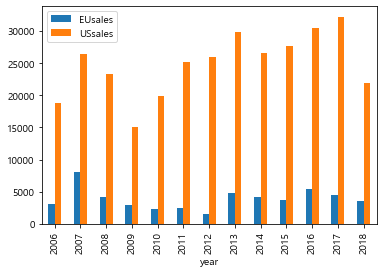

In [5]:
glssalesdf = pd.DataFrame(glssales.reshape(13,3))

# to use pd for plotting set year column one time
glssalesdf.columns = ['year','EUsales','USsales']
glssalesdf1 = glssalesdf

ax = glssalesdf1.set_index('year').plot( kind='bar')

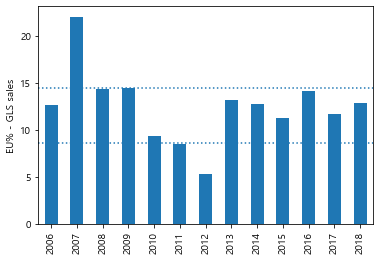

In [6]:
glsEUratio = glssalesdf.EUsales / glssalesdf.sum(axis=1) *100
glsEUratio.plot.bar()
plt.ylabel('EU% - GLS sales')
plt.axhline(glsEUratio.quantile(0.1), linestyle=':')
plt.axhline(glsEUratio.quantile(0.9), linestyle=':')
# X축에 연도 표시
plt.xticks(range(len(glssalesdf)),glssalesdf.year)
plt.show()

## Daily Data EDA

### pandas-datareader 활용 : Collecting Data from the Internet
- remote data access using pandas

In [7]:
# 주식시장 데이터 수집 예제

from pandas_datareader import data as pdr

# Define the instruments to download. We would like to see Apple, Amazon and the S&P500 index.
tickers = ['AAPL', 'AMZN', '^GSPC']

start_date = '2018-1-1'
end_date = '2020-12-01'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
# yahoo finance 에서 데이터 수집
panel_data = pdr.DataReader(tickers, 'yahoo', start_date, end_date)  

print(panel_data.reset_index().columns)
# panel_data.head(7)
panel_data.tail(7)

MultiIndex([(     'Date',      ''),
            ('Adj Close',  'AAPL'),
            ('Adj Close',  'AMZN'),
            ('Adj Close', '^GSPC'),
            (    'Close',  'AAPL'),
            (    'Close',  'AMZN'),
            (    'Close', '^GSPC'),
            (     'High',  'AAPL'),
            (     'High',  'AMZN'),
            (     'High', '^GSPC'),
            (      'Low',  'AAPL'),
            (      'Low',  'AMZN'),
            (      'Low', '^GSPC'),
            (     'Open',  'AAPL'),
            (     'Open',  'AMZN'),
            (     'Open', '^GSPC'),
            (   'Volume',  'AAPL'),
            (   'Volume',  'AMZN'),
            (   'Volume', '^GSPC')],
           names=['Attributes', 'Symbols'])


Attributes   Adj Close                                 Close               \
Symbols           AAPL         AMZN        ^GSPC        AAPL         AMZN   
Date                                                                        
2020-11-11  119.489998  3137.389893  3572.659912  119.489998  3137.389893   
2020-11-12  119.209999  3110.280029  3537.010010  119.209999  3110.280029   
2020-11-13  119.260002  3128.810059  3585.149902  119.260002  3128.810059   
2020-11-16  120.300003  3131.060059  3626.909912  120.300003  3131.060059   
2020-11-17  119.389999  3135.659912  3609.530029  119.389999  3135.659912   
2020-11-18  118.029999  3105.459961  3567.790039  118.029999  3105.459961   
2020-11-19  118.639999  3117.020020  3581.870117  118.639999  3117.020020   

Attributes                     High                                   Low  \
Symbols           ^GSPC        AAPL         AMZN        ^GSPC        AAPL   
Date                                                                        
2020-11-11  3572.659912  119.629997  3139.149902  3581.159912  116.440002   
2020-11-12  3537.010010  120.529999  3175.879883  3569.020020  118.570000   
2020-11-13  3585.149902  119.669998  3141.719971  3593.659912  117.870003   
2020-11-16  3626.909912  120.989998  3142.699951  3628.510010  118.150002   
2020-11-17  3609.530029  120.669998  3189.250000  3623.110107  118.959999   
2020-11-18  3567.790039  119.820000  3140.000000  3619.090088  118.000000   
2020-11-19  3581.870117  119.059998  3125.000000  3585.219971  116.809998   

Attributes                                  Open                            \
Symbols            AMZN        ^GSPC        AAPL         AMZN        ^GSPC   
Date                                                                         
2020-11-11  3050.000000  3557.000000  117.190002  3061.780029  3563.219971   
2020-11-12  3086.050049  3518.580078  119.620003  3159.949951  3562.669922   
2020-11-13  3085.389893  3552.570068  119.440002  3122.000000  3552.570068   
2020-11-16  3072.689941  3600.159912  118.919998  3093.199951  3600.159912   
2020-11-17  3135.260010  3588.679932  119.550003  3183.540039  3610.310059   
2020-11-18  3105.100098  3567.330078  118.610001  3134.000000  3612.090088   
2020-11-19  3080.919922  3543.840088  117.589996  3105.310059  3559.409912   

Attributes       Volume                           
Symbols            AAPL       AMZN         ^GSPC  
Date                                              
2020-11-11  112295000.0  4366900.0  4.609970e+09  
2020-11-12  103162300.0  4362000.0  4.890120e+09  
2020-11-13   81581900.0  3756200.0  4.709670e+09  
2020-11-16   91183000.0  3808700.0  5.281980e+09  
2020-11-17   74271000.0  3444700.0  4.799570e+09  
2020-11-18   76322100.0  2916800.0  5.274450e+09  
2020-11-19   73860200.0  2996800.0  4.347200e+09

In [8]:
# Rearrange Index Format

# 인덱스 재설정 후
cdf = panel_data.reset_index()
# 원하는 컬럼명을 다시 부여
cdf.columns = ['Date', 'AdjClose_AAPL', 'AdjClose_AMZN', 'AdjClose_SnP500', 
               'Close_AAPL', 'Close_AMZN', 'Close_SnP500',
              'Hi_AAPL', 'Hi_AMZN', 'Hi_SnP500',
               'Lo_AAPL', 'Lo_AMZN', 'Lo_SnP500',
              'Opn_AAPL', 'Opn_AMZN', 'Opn_SnP500',
              'Vlm_AAPL', 'Vlm_AMZN', 'Vlm_SnP500']           
cdf.tail()

,Date,AdjClose_AAPL,AdjClose_AMZN,AdjClose_SnP500,Close_AAPL,Close_AMZN,Close_SnP500,Hi_AAPL,Hi_AMZN,Hi_SnP500,Lo_AAPL,Lo_AMZN,Lo_SnP500,Opn_AAPL,Opn_AMZN,Opn_SnP500,Vlm_AAPL,Vlm_AMZN,Vlm_SnP500
723,2020-11-13,119.260002,3128.810059,3585.149902,119.260002,3128.810059,3585.149902,119.669998,3141.719971,3593.659912,117.870003,3085.389893,3552.570068,119.440002,3122.000000,3552.570068,81581900.0,3756200.0,4.709670e+09
724,2020-11-16,120.300003,3131.060059,3626.909912,120.300003,3131.060059,3626.909912,120.989998,3142.699951,3628.510010,118.150002,3072.689941,3600.159912,118.919998,3093.199951,3600.159912,91183000.0,3808700.0,5.281980e+09
725,2020-11-17,119.389999,3135.659912,3609.530029,119.389999,3135.659912,3609.530029,120.669998,3189.250000,3623.110107,118.959999,3135.260010,3588.679932,119.550003,3183.540039,3610.310059,74271000.0,3444700.0,4.799570e+09
726,2020-11-18,118.029999,3105.459961,3567.790039,118.029999,3105.459961,3567.790039,119.820000,3140.000000,3619.090088,118.000000,3105.100098,3567.330078,118.610001,3134.000000,3612.090088,76322100.0,2916800.0,5.274450e+09
727,2020-11-19,118.639999,3117.020020,3581.870117,118.639999,3117.020020,3581.870117,119.059998,3125.000000,3585.219971,116.809998,3080.919922,3543.840088,117.589996,3105.310059,3559.409912,73860200.0,2996800.0,4.347200e+09


- Google Finance has discontinued their API, and as such this feature is deprecated (marked for removal) in Pandas Datareader. Alternatives to Google Finance include Alpha Vantage, Quandl, and IEX.

''

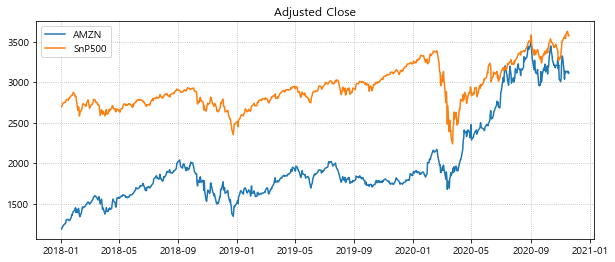

In [9]:
# Sampele Plotting

plt.figure(figsize=(10,4))
plt.plot(cdf.Date, cdf.AdjClose_AMZN)
plt.plot(cdf.Date, cdf.AdjClose_SnP500)
plt.legend(['AMZN','SnP500'])
plt.grid(linestyle=':')
plt.title('Adjusted Close')
;

In [10]:
# Date 컬럼은 datetime 포맷으로 지정되어 있음

cdf.dtypes[:5]

Date               datetime64[ns]
AdjClose_AAPL             float64
AdjClose_AMZN             float64
AdjClose_SnP500           float64
Close_AAPL                float64
dtype: object

''

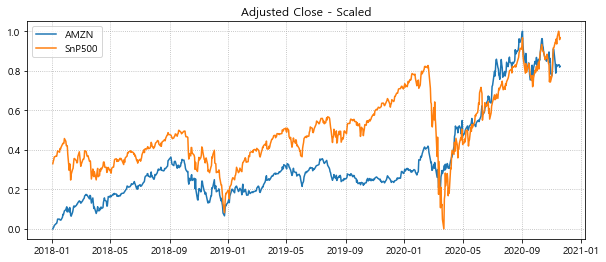

In [11]:
# MinMax Scaling 적용

plt.figure(figsize=(10,4))
plt.plot(cdf.Date, mnmx_scl(cdf.AdjClose_AMZN))
plt.plot(cdf.Date, mnmx_scl(cdf.AdjClose_SnP500))
plt.legend(['AMZN','SnP500'])
plt.grid(linestyle=':')
plt.title('Adjusted Close - Scaled')
;

In [12]:
# 상관관계 확인

np.corrcoef(cdf.AdjClose_AMZN, cdf.AdjClose_SnP500)

array([[1.        , 0.77938129],
       [0.77938129, 1.        ]])

''

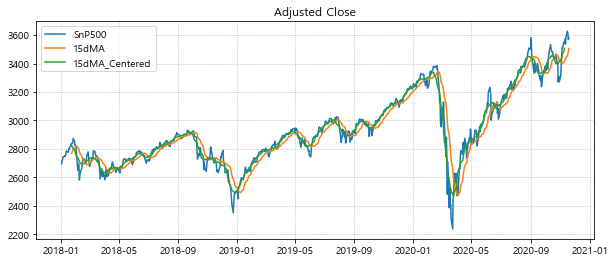

In [13]:
# 5일 이동평균선 추가
rolling_mean = cdf.AdjClose_SnP500.rolling(window=15).mean()
shiftedrolling_mean = cdf.AdjClose_SnP500.shift(-7).rolling(window=15).mean()

plt.figure(figsize=(10,4))
plt.plot(cdf.Date, cdf.AdjClose_SnP500)
plt.plot(cdf.Date, rolling_mean)
plt.plot(cdf.Date, shiftedrolling_mean)
plt.legend(['SnP500', '15dMA', '15dMA_Centered'])
plt.grid(linestyle=':')
plt.title('Adjusted Close')
;

Date
2018-01-31    1309.010946
2018-02-28    1442.363146
2018-03-31    1540.367629
2018-04-30    1468.220471
2018-05-31    1594.903637
Freq: M, Name: AdjClose_AMZN, dtype: float64

Text(0.5, 1.0, 'AdjClose AMZN - Monthly')

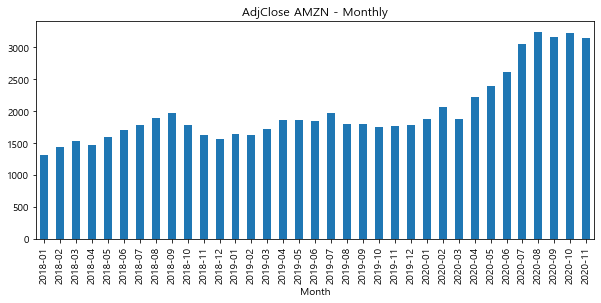

In [14]:
# 월별 평균을 구하고자 한다면

cdf1 = cdf.copy()
cdf1.set_index('Date', inplace=True)
# Date 자료형으로 index 날짜 변환
cdf1.index = pd.to_datetime(cdf1.index)

# resample 함수를 사용해서 월단위 집계값을 생성
cdf1Mn = cdf1.resample('1M').mean().AdjClose_AMZN
display(cdf1Mn.head())
# 월별 말일 기준으로 날짜 표시

cdf1Mn.index = cdf1Mn.index.strftime('%Y-%m-%d').str.slice(0,7)
cdf1Mn.index.name = 'Month'
cdf1Mn.index

plt.figure(figsize=(10,4))
cdf1Mn.plot.bar()
plt.title('AdjClose AMZN - Monthly')


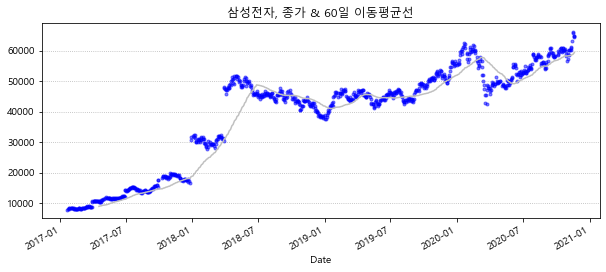

In [15]:
from datetime import datetime 

startday = datetime(2017,1,20) 
endday = datetime(2020,12,3)

# 삼성전자를 가져오는 경우
samsung = pdr.get_data_yahoo('005930.KS', startday, endday)

'''
samsung.reset_index(inplace=True)
samsung['Date'] = pd.to_datetime(samsung['Date'])

# Set the date as index 
samsung.set_index('Date', inplace=True)
'''
plt.figure(figsize=(10,4))
samsung['Adj Close'].plot(style='b.', alpha=0.5)
# 45일 이동평균선 추가
plt.plot(samsung['Adj Close'].rolling(60).mean(), color='silver')
plt.title('삼성전자, 종가 & 60일 이동평균선')
plt.grid(linestyle=':', axis='y') # 가로 보조선만 추가
plt.show()


In [16]:
# 주식종목 코드 조회
stockcode = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]

cmpname = '삼성전자'
stockcode[stockcode['회사명']==cmpname]

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
1703,삼성전자,5930,통신 및 방송 장비 제조업,"IMT2000 서비스용 동기식 기지국,교환국장비,데이터단말기,동영상휴대폰,핵심칩,반...",1975-06-11,12월,"김기남, 김현석, 고동진",http://www.sec.co.kr,경기도


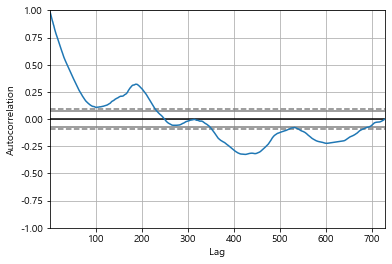

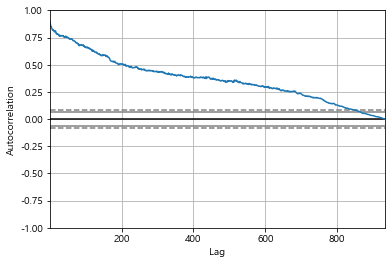

In [17]:
# AutoCorrelation

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(cdf.AdjClose_SnP500)
plt.show()

autocorrelation_plot(samsung)
plt.show()

# 시간적으로 가까운 값일 수록 (=lag가 작을수록) 강한 양의 관계
# 주기성(e.g.계절성)이 존재하는지 확인, 얼마나 긴 기간의 lag를 변수로 사용할 것인지에 참고

### [추세-계절 분해] 계절성이 존재하는 경우

NameError: name 'pyplot' is not defined

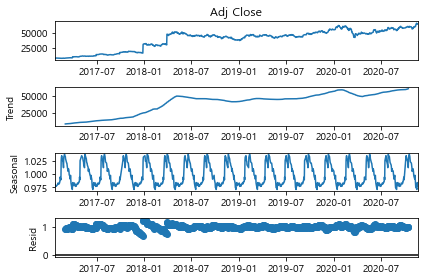

In [18]:
# 추세-계절 분해

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(samsung['Adj Close'], model='multiplicative', 
                            freq=52) # multiplicative or additive
result.plot()
pyplot.show()

In [ ]:
unicloGT = pd.read_csv(dataPath + 'unicloGT_20191026.csv')

unicloGT['date'] = pd.to_datetime(unicloGT['date'])
# Set the date as index 
unicloGT = unicloGT.set_index('date')


# 추세-계절 분해

from statsmodels.tsa.seasonal import seasonal_decompose

series = unicloGT.uniclo
result = seasonal_decompose(series, model='multiplicative', freq=52) # multiplicative or additive
result.plot()
pyplot.show()

[실전적 방안] 계절성이 존재한다고 판단된다면 연도별 월별 overaly와 연도단위 변화 추이를 구분해서 시각화?